<a href="https://colab.research.google.com/github/karthikeyanmuthurangam/extensive-vision-ai-program/blob/master/Session3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


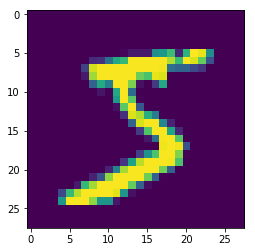

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
from keras.layers import Activation
model = Sequential()

dropout = 0.1

# Convolution Block - 1
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1), bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(32, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 1
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation='relu', bias=False))
model.add(Dropout(dropout))

# Convolution Block - 2
model.add(Convolution2D(24, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 2
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation= 'relu', bias=False))
model.add(Dropout(dropout))

model.add(Convolution2D(10, 3, 3))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_18 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        9216      
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [75]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1)

Epoch 1/10
 1792/60000 [..............................] - ETA: 6s - loss: 0.1023 - acc: 0.9531

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 5s 83us/step - loss: 0.0983 - acc: 0.9542
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0951 - acc: 0.9544
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0976 - acc: 0.9534
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0949 - acc: 0.9536
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0950 - acc: 0.9540
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0943 - acc: 0.9541
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0922 - acc: 0.9553
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0940 - acc: 0.9538
Epoch 9/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0925 - acc: 0.9546
Epoch 10/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0916 - acc: 0.9550


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [77]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.022888028327966457, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [29]:
print(y_pred[:9])
print(y_test[:9])

[[1.57187088e-07 5.95277605e-10 1.49555262e-06 2.72977704e-05
  3.99798873e-15 1.25318920e-07 2.12473963e-17 9.99965310e-01
  1.91937445e-07 5.44220211e-06]
 [1.79043418e-04 1.03413586e-04 9.99649882e-01 6.61564191e-05
  3.14352189e-09 3.78129926e-07 1.40716978e-07 1.54907254e-09
  1.08854533e-06 1.77492321e-09]
 [5.31439298e-07 9.99472678e-01 5.63095091e-05 1.44066985e-06
  2.74012200e-05 1.64210986e-04 8.40277551e-07 2.70710530e-04
  5.65125129e-06 3.42777668e-07]
 [9.99922872e-01 2.16150899e-11 3.30922120e-07 5.25721795e-08
  7.49341422e-10 1.87750857e-06 1.72832861e-05 2.49495002e-09
  1.23456186e-06 5.63447029e-05]
 [7.59334089e-12 7.52353380e-09 6.83090988e-08 1.79599211e-10
  9.99785364e-01 1.02787658e-06 5.09258802e-10 1.88802094e-08
  1.88851335e-09 2.13479187e-04]
 [3.24200577e-08 9.99875307e-01 4.56039561e-06 1.67675211e-07
  1.99135479e-06 2.01817929e-05 1.35526115e-08 9.64966748e-05
  1.11738211e-06 2.85278290e-08]
 [4.38574009e-13 3.18033235e-05 1.81230527e-04 3.33504491e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


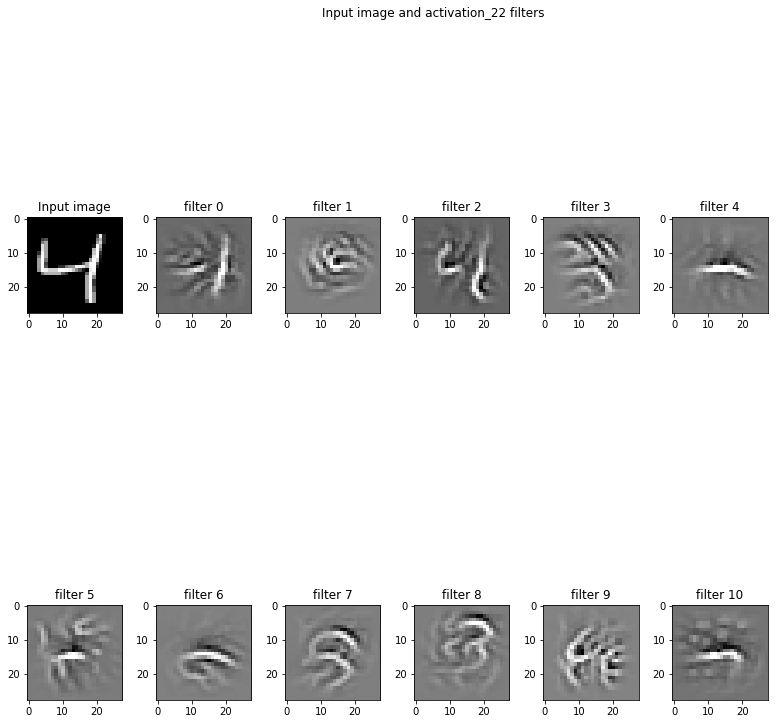

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_38'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

print(Y_train[2])
vis_img_in_filter(np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 'activation_22')